###**Diabetes Dataset**#

## MISSIING VALUE

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector



# Load the Diabetes dataset
df_diabetes = pd.read_csv('diabetes.csv')

In [2]:
# Step 1: Identify and remove features with more than 30% missing values
missing_threshold = 30
missing_percentage = df_diabetes.isnull().mean() * 100
print("Missing values percentage per feature:\n", missing_percentage)

df_filtered = df_diabetes.loc[:, missing_percentage < missing_threshold]
print(f"\nRemaining columns after filtering: {df_filtered.columns.tolist()}")

Missing values percentage per feature:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Remaining columns after filtering: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [3]:
# Step 2: Prepare the data
X = df_filtered.drop(columns=['Outcome'])  # Drop the target column
y = df_filtered['Outcome']  # Target variable

In [4]:
# Fill remaining missing values with median
X = X.fillna(X.median())

In [5]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy after filtering: {accuracy:.4f}")


Model accuracy after filtering: 0.7468


##High Correlation Filter

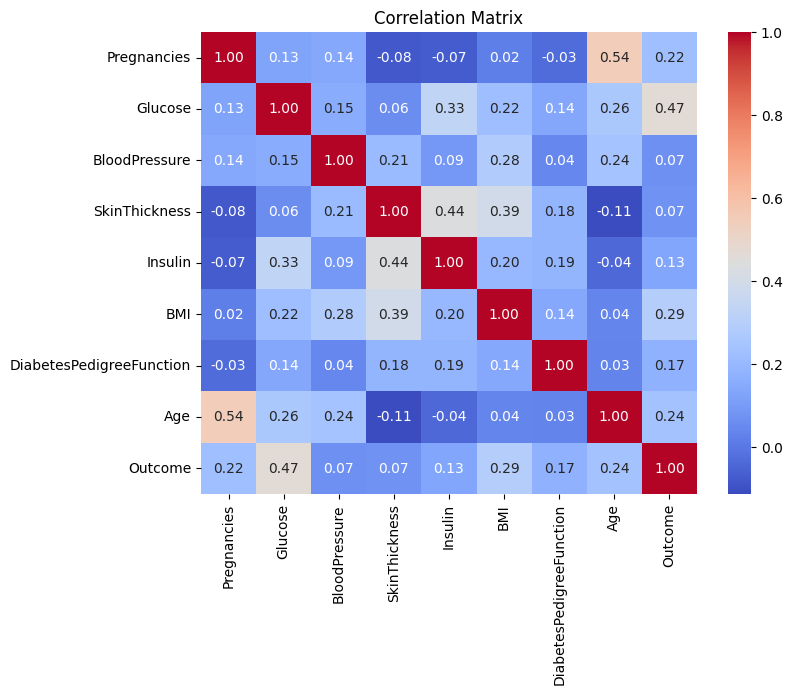

In [8]:
# Step 1: Compute the correlation matrix
corr_matrix = df_diabetes.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [9]:
# Step 2: Remove highly correlated features (correlation > 0.8)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print(f"\nHighly correlated features (>0.8): {high_corr_features}")

df_filtered = df_diabetes.drop(columns=high_corr_features)
print(f"\nRemaining columns after correlation filter: {df_filtered.columns.tolist()}")


Highly correlated features (>0.8): []

Remaining columns after correlation filter: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


##Low Variance Filter

In [10]:
# Step 1: Apply a low variance filter (threshold = 0.1)
X = df_diabetes.drop('Outcome', axis=1)
selector = VarianceThreshold(threshold=0.1)
X_low_variance = selector.fit_transform(X)

In [11]:
# Step 2: Get selected features
selected_features = X.columns[selector.get_support()]
print(f"\nSelected features after low variance filter: {selected_features.tolist()}")


Selected features after low variance filter: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [12]:
# Step 3: Create a new DataFrame with selected features
df_filtered = pd.DataFrame(X_low_variance, columns=selected_features)

##Forward Feature Selection

In [13]:
# Step 1: Perform Forward Feature Selection
model = LogisticRegression(max_iter=1000)
sfs_forward = SequentialFeatureSelector(model, direction='forward', n_features_to_select=5)
sfs_forward.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          n_features_to_select=5)

In [14]:
# Step 2: Get the selected features
selected_features = X.columns[sfs_forward.get_support()]
print(f"\nSelected features (Forward Selection): {selected_features.tolist()}")


Selected features (Forward Selection): ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']


In [15]:
#Train a model using these selected features
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (Forward Selection): {accuracy:.4f}")



Accuracy (Forward Selection): 0.7403


##Backward Feature Elimination

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Step 1: Prepare the data (if not done already)
X = df_filtered  # Assuming df_filtered is the dataset after applying necessary filters
y = df_diabetes['Outcome']

In [17]:
# Step 2: Perform Backward Feature Elimination
model = LogisticRegression(max_iter=1000)
sfs_backward = SequentialFeatureSelector(model, direction='backward', n_features_to_select=5)
sfs_backward.fit(X, y)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=1000),
                          n_features_to_select=5)

In [18]:
# Step 3: Get the selected features
selected_features = X.columns[sfs_backward.get_support()]
print(f"\nSelected features (Backward Elimination): {selected_features.tolist()}")


Selected features (Backward Elimination): ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']


In [19]:
# Optional: Train a model using these selected features
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (Backward Elimination): {accuracy:.4f}")



Accuracy (Backward Elimination): 0.7143


##Random Forest Feature **Importance**

In [20]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Train Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [21]:
# Step 2: Get feature importances
importances = model_rf.feature_importances_

In [22]:

# Step 3: Select top 5 important features
top_features = X.columns[np.argsort(importances)[-5:]]

In [23]:
# Step 4: Print the top 5 features
print(f"\nTop 5 important features (Random Forest): {top_features.tolist()}")


Top 5 important features (Random Forest): ['BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose']


In [24]:
#Train a model using these top features
X_top_features = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy (Random Forest with Top 5 Features): {accuracy_rf:.4f}")



Accuracy (Random Forest with Top 5 Features): 0.7532


#**Melbourne Dataset**

## MISSIING VALUE

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Load the Melbourne Housing dataset
df_melbourne = pd.read_csv('melb data.csv')



In [26]:
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [27]:
# plt.figure(figsize=(150, 30))
# sns.countplot(x = 'Suburb',data=df)

In [28]:
df_melbourne['Suburb'].value_counts()

,count
Suburb,
Reservoir,844
Bentleigh East,583
Richmond,552
Glen Iris,491
Preston,485
...,...
Belgrave,1
Cranbourne East,1
Yarra Glen,1


In [29]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical columns
categorical_columns = df_melbourne.select_dtypes(include=['object']).columns.tolist()

# Step 2: Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_melbourne[column] = label_encoder.fit_transform(df_melbourne[column])

print(f"\nData after Label Encoding:\n{df_melbourne.head()}")



Data after Label Encoding:
   Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  Distance  \
0       0    29458      2     0        NaN       6      155    58       2.5   
1       0    32512      2     0  1480000.0       2       33    60       2.5   
2       0    15389      2     0  1035000.0       2       33    63       2.5   
3       0     9768      3     2        NaN       7      296    63       2.5   
4       0    25128      3     0  1465000.0       5       33    64       2.5   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0    3067.0  ...       1.0  1.0     126.0           NaN        NaN   
1    3067.0  ...       1.0  1.0     202.0           NaN        NaN   
2    3067.0  ...       1.0  0.0     156.0          79.0     1900.0   
3    3067.0  ...       2.0  1.0       0.0           NaN        NaN   
4    3067.0  ...       2.0  0.0     134.0         150.0     1900.0   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0        

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) # Dependent variable doesn't needs to be a numpy array

In [31]:
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,NaN,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,NaN,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


In [32]:
#Import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

# Step 1: Identify and remove features with more than 20% missing values
missing_threshold = 20
missing_percentage = df_melbourne.isnull().mean() * 100
print("Missing values percentage per feature:\n", missing_percentage)

# Impute missing values in 'Price' with the median
df_melbourne['Price'] = df_melbourne['Price'].fillna(df_melbourne['Price'].median())

# Exclude 'Price' from missing value filtering for other columns
columns_to_check = [col for col in df_melbourne.columns if col != 'Price']
filtered_columns = missing_percentage[columns_to_check][missing_percentage[columns_to_check] < missing_threshold].index
df_filtered = df_melbourne[filtered_columns.union(['Price'])]

print(f"\nRemaining columns after filtering: {df_filtered.columns.tolist()}")

# Data Preparation for Model Training (Modified)
X = df_filtered.drop(columns=['Price'])
y = df_filtered['Price']

# Impute remaining missing values in features (X) with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=df_filtered.drop(columns=['Price']).columns)

Missing values percentage per feature:
 Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.000000
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.000000
Propertycount     0.008607
dtype: float64

Remaining columns after filtering: ['Address', 'CouncilArea', 'Date', 'Distance', 'Method', 'Postcode', 'Price', 'Propertycount', 'Regionname', 'Rooms', 'SellerG', 'Suburb', 'Type']


In [33]:
# Step 2: Prepare the data
df_filtered = df_filtered.dropna(subset=['Price'])
X = df_filtered.drop(columns=['Price'])
y = df_filtered['Price']

In [34]:
# Fill remaining missing values with median
X = X.fillna(X.median())

In [35]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Step 4: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Step 5: Evaluate the model
r2_score = model.score(X_test, y_test)
print(f"\nR-squared after missing values filtering: {r2_score:.4f}")


R-squared after missing values filtering: 0.3040


##High Correlation Filter

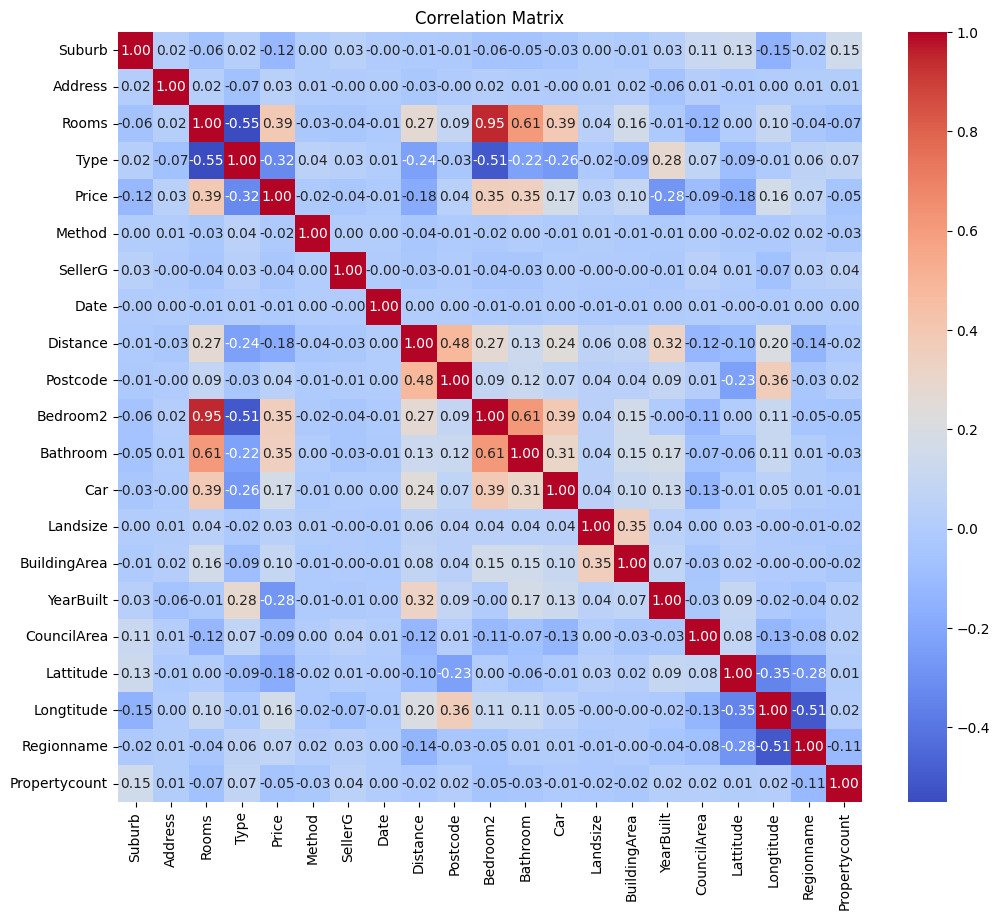

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute the correlation matrix
corr_matrix = df_melbourne.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [39]:
# Step 2: Remove highly correlated features (correlation > 0.85)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
print(f"\nHighly correlated features (>0.85): {high_corr_features}")

df_filtered = df_melbourne.drop(columns=high_corr_features)
print(f"\nRemaining columns after correlation filter: {df_filtered.columns.tolist()}")


Highly correlated features (>0.85): ['Bedroom2']

Remaining columns after correlation filter: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


##Low Variance Filter

In [40]:
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,870000.0,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,870000.0,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


In [41]:
from sklearn.feature_selection import VarianceThreshold

# Step 1: Apply a low variance filter (threshold = 0.1)
X = df_melbourne.drop('Price', axis=1)
selector = VarianceThreshold(threshold=0.1)
X_low_variance = selector.fit_transform(X)

In [42]:
# Step 2: Get selected features
selected_features = X.columns[selector.get_support()]
print(f"\nSelected features after low variance filter: {selected_features.tolist()}")



Selected features after low variance filter: ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount']


In [43]:
# Step 3: Create a new DataFrame with selected features
df_filtered = pd.DataFrame(X_low_variance, columns=selected_features)

##Forward Feature Selection

In [44]:
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,870000.0,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,870000.0,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


In [45]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Assuming 'X' is feature DataFrame and 'y' is target variable
# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent', etc.
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame to preserve column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Ensure X_imputed and y have the same number of rows
X_imputed = X_imputed.iloc[:len(y)] # Select the first len(y) rows of X_imputed

# Step 1: Perform Forward Feature Selection with the imputed data
model = LinearRegression()
sfs_forward = SequentialFeatureSelector(model, direction='forward', n_features_to_select=5)
sfs_forward.fit(X_imputed, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [46]:
# Step 2: Get the selected features
selected_features = X.columns[sfs_forward.get_support()]
print(f"\nSelected features (Forward Selection): {selected_features.tolist()}")


Selected features (Forward Selection): ['Rooms', 'Type', 'Distance', 'Postcode', 'Lattitude']


In [47]:
# Optional: Train a model using these selected features
# Use X_imputed (the imputed data) to create X_selected
X_selected = X_imputed[selected_features]

# Ensure X_selected and y have the same number of rows before splitting
X_selected = X_selected.iloc[:len(y)]  # Select the first len(y) rows of X_selected

# Now proceed with the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)
print(f"\nR-squared (Forward Selection): {r2_score:.4f}")


R-squared (Forward Selection): 0.3223


In [48]:
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,870000.0,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,870000.0,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


##Backward Feature Elimination

In [49]:
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,870000.0,6,155,58,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,60,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,63,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,870000.0,7,296,63,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,64,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


In [50]:
# Check if 'Price' is in the columns of df_filtered
if 'Price' in df_filtered.columns:
    X = df_filtered.drop('Price', axis=1)  # Assuming df_filtered is the dataset after filtering
    y = df_filtered['Price']
else:
    print("Column 'Price' not found in df_filtered. Please check your DataFrame.")
    # You can print the columns to see what is available:
    print("Available columns:", df_filtered.columns)

Column 'Price' not found in df_filtered. Please check your DataFrame.
Available columns: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')


In [51]:
# # Step 2: Perform Backward Feature Elimination using Random Forest
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# sfs_backward = SequentialFeatureSelector(model, direction='backward', n_features_to_select=5)
# sfs_backward.fit(X, y)

In [52]:
# # Step 3: Get the selected features
# selected_features = X.columns[sfs_backward.get_support()]
# print(f"\nSelected features (Backward Elimination): {selected_features.tolist()}")

In [53]:
# # Optional: Train a model using these selected features
# X_selected = X[selected_features]
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# r2_score = model.score(X_test, y_test)
# print(f"\nR-squared (Backward Elimination): {r2_score:.4f}")

##Random Forest Feature **Importance**

In [54]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Train Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [55]:
# Step 2: Get feature importances
importances = model_rf.feature_importances_

In [56]:
# Step 3: Select top 5 important features
top_features = X.columns[np.argsort(importances)[-5:]]

In [57]:
# Step 4: Print the top 5 features
print(f"\nTop 5 important features (Random Forest): {top_features.tolist()}")



Top 5 important features (Random Forest): ['Address', 'Landsize', 'Postcode', 'Rooms', 'Distance']


In [58]:
# Optional: Train a model using these top features
X_top_features = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_score_rf = model_rf.score(X_test, y_test)
print(f"\nR-squared (Random Forest with Top 5 Features): {r2_score_rf:.4f}")


R-squared (Random Forest with Top 5 Features): 0.3627
